In [1]:
import pandas as pd
import json
import os
import psutil
import missingno

def get_mem():
    # Getting % usage of virtual_memory ( 3rd field)
    print('RAM memory % used:', psutil.virtual_memory()[2])
    # Getting usage of virtual_memory in GB ( 4th field)
    print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

leer archivos en directorio

path1 = './raw_data/s1/AGUASCALIENTES/'

#Open a files
data_dict = {}
with os.scandir(path1) as files:
    for entry in files:
        with open(os.path.join(path1, entry.name), 'r') as f:
            file_data = json.load(f)
            data_dict[entry.name[-8:-5]] = file_data

get_mem()

Revisar si existen id en base sistema 2 corresponden a id de sistema 1

data_dict.keys()

count = 0

ids_search=[]
for key in data_dict.keys():
    for e in data_dict[key]:
        count += 1
        ids_search.append(e['id'])
print(len(ids_search))

count

Cargar data base sistema 2

In [9]:
final_columns = [
    'fechaCaptura',
    'nombres', 
    'primerApellido',
    'segundoApellido',
    'nivelResponsabilidad',
    'tipoProcedimiento',
    'institucionDependencia.nombre',
    'puesto.nombre',
]

In [2]:
path2 = './raw_data/s2/EDOMEX'

In [3]:
data_dict = {}
with os.scandir(path2) as files:
    for entry in files:
        with open(os.path.join(path2, entry.name), 'r') as f:
            file_data = json.load(f)
            data_dict[entry.name[-8:-5]] = file_data

In [4]:
json_names = [k for k in data_dict.keys()]

In [5]:
data_frames=[]
for name in json_names:
    data_frames.append(
        pd.json_normalize(
                    data_dict[name],
                    record_path=None,
                    meta=None, 
                    meta_prefix=None, 
                    record_prefix=None, 
                    errors='raise', 
                    sep='.', 
                    max_level=None,
                    )
        )
    
    
 
        

In [6]:
for frame in data_frames:
    print(frame.shape)

(200, 23)
(200, 24)
(200, 24)
(200, 24)
(200, 24)
(200, 24)
(200, 24)
(200, 24)
(200, 24)
(200, 23)
(200, 14)
(200, 24)
(200, 24)
(200, 14)
(19, 23)
(200, 14)
(200, 24)
(200, 23)


In [8]:
data_frames[10].head()

,id,fechaCaptura,nombres,primerApellido,segundoApellido,nivelResponsabilidad,tipoProcedimiento,institucionDependencia.nombre,institucionDependencia.siglas,institucionDependencia.clave,puesto.nombre,puesto.nivel,superiorInmediato.primerApellido,superiorInmediato.segundoApellido
0,62d3dafab598ee27666c1d4f,2015-11-04T20:37:35Z,FERMIN,TRINIDAD,SAN JUAN,"[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",Secretaría de Finanzas,finanzas,eje-013,"Secretaria ""D""",KZF50,CAMPUZANO,RAMIREZ
1,62d3dafab598ee27666c1d56,2015-11-05T11:01:38Z,MEDARDO ALFREDO,DOMINGUEZ,TORRES,"[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",Secretaría de Finanzas,finanzas,eje-013,"Jefe ""A"" Proyecto",BGIQ0,RAMOS,VEGA
2,6375166e7943e2ab46eb9833,2015-11-05T11:54:34Z,MONICA EVA,ESQUIVEL,VARGAS,"[{'clave': 'A', 'valor': 'ATENCIÓN'}]","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA...",Secretaría del Medio Ambiente,sma,eje-081,Jefe B De Proyecto,354QG,,
3,6375166e7943e2ab46eb9838,2015-11-05T12:01:51Z,JOSE LUIS,RAMIREZ,ARROYO,"[{'clave': 'T', 'valor': 'TRAMITACIÓN'}]","[{'clave': 2, 'valor': 'CONCESIONES, LICENCIAS...",Secretaría del Medio Ambiente,sma,eje-081,Inspector De Ecología,EV3I5,,
4,6375166e7943e2ab46eb983f,2015-11-05T12:04:17Z,VIRIDIANA,MARTÍNEZ,MENDEZ,"[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...","[{'clave': 2, 'valor': 'CONCESIONES, LICENCIAS...",Secretaría del Medio Ambiente,sma,eje-081,Inspector De Ecología,EV3I5,,


count = 0
for frame in data_frames:
    print(count)
#frame['nivelResponsabilidad'] = frame['nivelResponsabilidad'].apply(lambda col: col[0])
#frame['tipoProcedimiento'] = frame['tipoProcedimiento'].apply(lambda col: col[0])
    
#frame['nivelResponsabilidad'] = frame['nivelResponsabilidad'].apply(lambda col: col['clave'])
#frame['tipoProcedimiento'] = frame['tipoProcedimiento'].apply(lambda col: col['clave'])
    try:
        frame.drop(['id'], axis=1, inplace=True, errors='raise')
    except:
        print('no id')
        pass
    try:
        frame.drop(['puesto.nivel'], axis=1, inplace=True, errors='raise')
    except:
        print('no puesto.nivel')
        pass
    try:
        frame.drop(['institucionDependencia.siglas'], axis=1, inplace=True, errors='raise')
    except:
        print('no institucionDependencia.siglas')
        pass
    try:
        frame.drop(['ramo.clave'], axis=1, inplace=True, errors='raise')
    except:
        print('no ramo.clave')
        pass
    try:
        frame.drop(['ramo.valor'], axis=1, inplace=True, errors='raise')
    except:
        print('no ramo.valor')
        pass
    try:
        frame.drop(['tipoArea'], axis=1, inplace=True, errors='raise')
    except:
        print('no tipoArea')
        pass
    try:
        frame.drop(['superiorInmediato.puesto.nivel'], axis=1, inplace=True, errors='raise')
    except:
        print('no superiorInmediato.puesto.nivel')
        pass
    
    count += 1
    

In [11]:
data_frames2 = []
for frame in data_frames:
    data_frames2.append(frame[frame.columns.intersection(final_columns)])

ags0['nivelResponsabilidad'] = ags0['nivelResponsabilidad'].apply(lambda col: col[0])

ags0['tipoProcedimiento'] = ags0['tipoProcedimiento'].apply(lambda col: col[0])

ags0['nivelResponsabilidad'] = ags0['nivelResponsabilidad'].apply(lambda col: col['clave'])

ags0['tipoProcedimiento'] = ags0['tipoProcedimiento'].apply(lambda col: col['clave'])

In [12]:
for frame in data_frames2:
    print(frame.shape)

(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(200, 8)
(19, 8)
(200, 8)
(200, 8)
(200, 8)


In [14]:
final = pd.concat([f for f in data_frames2], axis=0)

<AxesSubplot: >

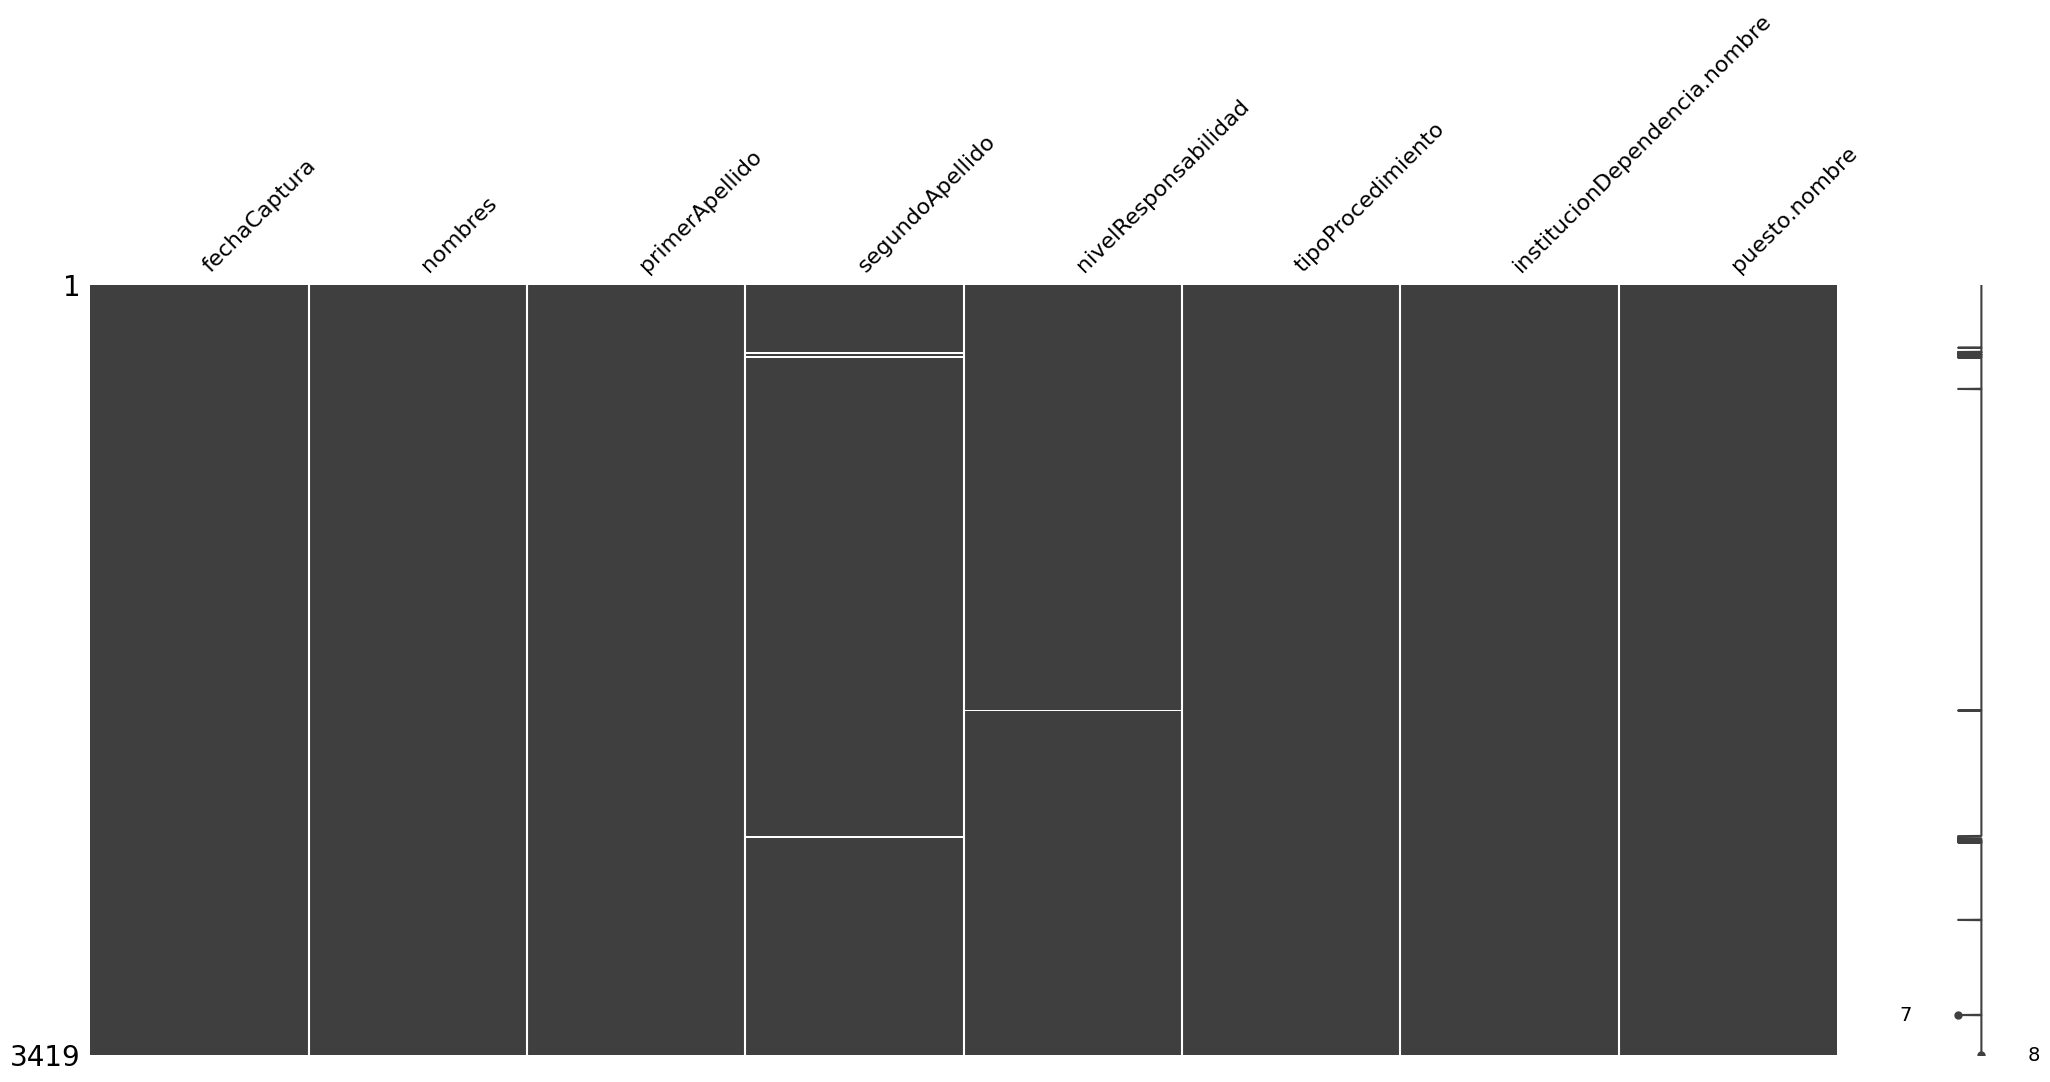

In [15]:
missingno.matrix(final)

In [16]:
final.to_csv('edomex_v1.csv')